In [ ]:
import numpy as np
from scipy.linalg import hessenberg, qr, solve, lu_factor, lu_solve
from math import exp, sin, tan, cos, pi, cosh
import matplotlib.pyplot as plt

модифицированный классический метод решения однородного уравнения Шредингера
------------------------------------------------------------------------------------------

In [ ]:
def E0(H, ksi, a, b):
  numerator = np.sum(np.abs(ksi)**2 * H * ksi / ksi) / np.sum(np.abs(ksi)**2)
  # Возвращаем результат
  return numerator


In [ ]:

#примеры для тестирования
def insert_test(check_test):
    if (check_test == 3):
        x_min = -4
        x_max = 4
        a = 0.16
        n_points = 100  # Количество точек на сетке
        dx = (x_max - x_min) / (n_points - 1)
        x = np.linspace(x_min, x_max, n_points)
        V0 = 16
        V = np.zeros(n_points)  # Функция потенциала V(x)

        for i in range(n_points):
            V[i] = - V0 / ((cosh(i))**2)

    if (check_test == 2):
        x_min = 0
        x_max = 4
        a = 2.1
        n_points = 100#400  # Количество точек на сетке
        n_p = 50#200
        dx = (x_max - x_min) / (n_points - 1)
        x = np.linspace(x_min, x_max, n_points)
        V0 = 30
        V = np.zeros(n_points)  # Функция потенциала V(x)

        for i in range(n_p):
            V[i] = - V0
    if (check_test == 1):
        x_min = 0
        x_max = 1
        a = 1/2
        n_points = 100  # Количество точек на сетке
        dx = (x_max - x_min) / (n_points - 1)
        x = np.linspace(x_min, x_max, n_points)
        V = np.zeros(n_points)  # Функция потенциала V(x)

    if (check_test == 4):
       x_min = 0
       x_max = 4
       a = 2
       n_points = 100
       dx = (x_max - x_min) / (n_points - 1)
       x = np.linspace(x_min, x_max, n_points)
       V = np.zeros(n_points)  # Функция потенциала V(x)
       V0 = 30
       for i in range(n_points):
        V[i] = -V0


    return x_min, x_max, a , n_points, dx, V



In [ ]:
def get_H(test):
  x_min, x_max, a , n_points, dx, V = insert_test(test)
  x = np.linspace(x_min, x_max, n_points)



  # Создание матрицы Гамильтона с использованием конечно-разностной аппроксимации
  H = np.zeros((n_points, n_points))
  for i in range(n_points):
      H[i, i] = 2 * a / (dx ** 2) + V[i]
      if i > 0:
          H[i, i-1] = -a / (dx ** 2)
      if i < n_points - 1:
          H[i, i+1] = -a / (dx ** 2)
  return H, x, x_min, x_max

In [ ]:
def plot_graph(y, color_y):
    x = np.arange(len(y))
    plt.plot(x, y, color = color_y)
    plt.xlabel('x', color = 'blue')
    plt.ylabel('Ksi', color = 'blue')
    plt.title('Волновая функция', color = 'blue')
    plt.grid(True)
    plt.legend()
    plt.xticks([])
    plt.show()

In [ ]:
def plot_two_graph(y, z, color_y, color_z):
    x = np.arange(len(y))
    fig, ax = plt.subplots()
    ax.plot(x, y, color=color_y, label='y')
    ax.plot(x, z, color=color_z, label='z')
    ax.set_xlabel('x', color='blue')
    ax.set_ylabel('Ksi', color='blue')
    ax.set_title('Волновая функция', color='blue')
    ax.grid(True)
    ax.legend()
    plt.xticks([])
    plt.show()

In [ ]:
H, x_, a, b = get_H(1)
H, x, a, b = get_H(1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_f2(v, color_v, i, x_labels):
    x = np.arange(len(v[0]))
    #x = x_labels
    fig, ax = plt.subplots()
    #ax.set_xlabel('тут потом поправлю, пока они по от 0 до конца массива', color='blue')
    ax.set_ylabel('Ksi', color='blue')
    for a in range(i):
        ax.plot(x, v[a], color=color_v[a], label=f'Graph {a+1}')
    ax.set_title('Волновая функция', color='blue')
    ax.grid(True)
    ax.legend()
    ax.set_xticklabels([])
    plt.show()


In [ ]:

def get_roots(A, i):
    """
    Get roots of system of two equations (i and i+1) of matrix A
    """
    n = A.shape[0]
    a11 = A[i][i]
    a12 = A[i][i + 1] if i + 1 < n else 0
    a21 = A[i + 1][i] if i + 1 < n else 0
    a22 = A[i + 1][i + 1] if i + 1 < n else 0
    return np.roots((1, -a11 - a22, a11 * a22 - a12 * a21))

def householder (A, i_):
    n = A.shape[0]
    v = np.zeros(n)
    a = A[:, i_]
    v[i_] = a[i_] + sign(a[i_]) * Norm(a[i_:])
    for i in range(i_ + 1, n):
        v[i] = a[i]
    v = v[:, np.newaxis]
    H = np.eye(n) - (2 / (v.T @ v)) * (v @ v.T)
    return H

def Norm(v):
    """
    Counts L2 norm of a vector
    """
    ans = 0
    for i in v:
        ans += i * i
    return np.sqrt(ans)

def QR_decomposition(A):
    n = A.shape[0]
    Q = np.eye(n)
    R = np.copy(A)
    for i in range(n-1):
        x = householder(R, i)
        Q = Q @ x
        R = x @ R
    return Q, R

def sign(x):
    return -1 if x < 0 else 1 if x > 0 else 0

def get_eigen_value(A, i, eps):
    A_i = np.copy(A)
    while True:
        Q, R = qr(A_i)#QR_decomposition(A_i)
        A_i = R @ Q
        if Norm(A_i[i + 1:, i]) <= eps:
            return A_i[i][i], A_i
        elif Norm(A_i[i + 2:, i]) <= eps and is_complex(A_i, i, eps):
            return get_roots(A_i, i), A_i

def is_complex(A, i, eps):

    Q, R = qr(A)#QR_decomposition(A)
    A_next = np.dot(R, Q)
    lambda1 = get_roots(A, i)
    lambda2 = get_roots(A_next, i)
    return abs(lambda1[0] - lambda2[0]) <= eps and abs(lambda1[1] - lambda2[1]) <= eps



def matrix_eigenvalue(A, eps):
    n = A.shape[0]
    A_i = np.copy(A)
    Q = []
    i = 0
    while i < n:
        Q_, A_i_plus_1 = get_eigen_value(A_i, i, eps)
        if isinstance(Q_, np.ndarray):
            # complex
            Q.extend(Q_)
            i = i + 2
        else:
            # real
            Q.append(Q_)
            i =i + 1
        A_i = A_i_plus_1
    return Q


In [ ]:
eps = 1e-6
max_iterations = 100
result = matrix_eigenvalue(H, eps)
result2 = np.sort(result)
n_points = 100
# Находим собственные векторы с помощью обратной итерации
tolerance = 1e-6  # Пороговое значение для проверки сходимости
max_iter = 100  # Максимальное количество итераций
eigenvectors = []
for eigenvalue in result2:
    A = H - eigenvalue * np.eye(n_points)
    x = np.full((n_points,), 1.0)#np.ones(n_points)
    for _ in range(max_iter):
        x_new = np.linalg.solve(A, x)
        x_new = x_new / np.linalg.norm(x_new)
        if np.linalg.norm(x - x_new) < tolerance:
            break
        x = x_new
    eigenvectors.append(x)

eigenvectors = np.array(eigenvectors)


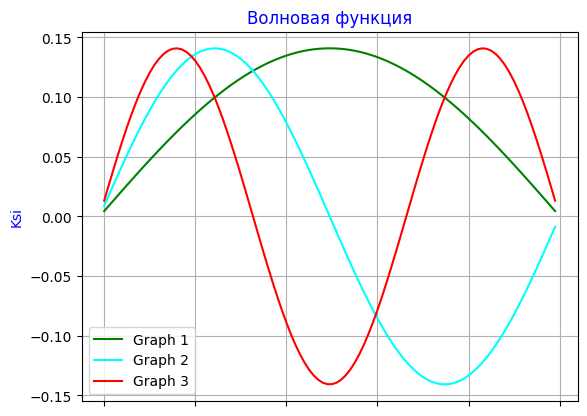

In [ ]:
c = ['green', 'aqua', 'red', 'blue', 'violet']
plot_f2(eigenvectors, c, 3, x)

тут нейросеть
------------------------------------------------------------------------------------------

In [ ]:
import csv
import numpy as np
import tensorflow as tf

def subexp(expon):
    return np.power(abs(np.log(np.random.uniform())),expon)

def generatepot(style,param): #0=step,1=linear,2=fourier; 0-1 Шкала «зубчатости»
    mu = 1. + bins*param #среднее количество точек перехода в стилях для 0 + 1
    forxp = 2.5 - 2*param #показатель Фурье для стиля 2
    scale = 5.0*(np.pi*np.pi*0.5) # энергетическая шкала
    if style < 2:
        dx = bins/mu
        xlist = [-dx/2]
        while xlist[-1] < bins:
            xlist.append(xlist[-1]+dx*subexp(1.))
        vlist = [scale*subexp(2.) for k in range(len(xlist))]
        k = 0
        poten = []
        for l in range(1,bins):
            while xlist[k+1] < l:
                k = k + 1
            if style == 0:
                poten.append(vlist[k])
            else:
                poten.append(vlist[k]+(vlist[k+1]-vlist[k])*(l-xlist[k])/(xlist[k+1]-xlist[k]))
    else:
        sincoef = [(2*np.random.randint(2)-1.)*scale*subexp(2.)/np.power(k,forxp) for k in range(1,bins//2)]
        coscoef = [(2*np.random.randint(2)-1.)*scale*subexp(2.)/np.power(k,forxp) for k in range(1,bins//2)]
        zercoef = scale*subexp(2.)
        poten = np.maximum(np.add(np.add(np.matmul(sincoef,sinval),np.matmul(coscoef,cosval)),zercoef),0).tolist()
    return poten

seed = 0
np.random.seed(seed)
bins = 101  #dx = 1/bins; фактическое количество сохраненных столбцов  = bins-1, because 1st and last are 0
npots = 100  #в конечном итоге становится 3*this*(validnth-1)/validnth
validnth = 5 #каждый n-й образец функции сохраняется как проверка
sinval = np.sin([[np.pi*i*j/bins for i in range(1,bins)] for j in range(1,bins//2)])
cosval = np.cos([[np.pi*i*j/bins for i in range(1,bins)] for j in range(1,bins//2)])
sqrt2 = np.sqrt(2)

defgrdstate = tf.constant([sqrt2*np.sin(i*np.pi/bins) for i in range(1,bins)])
psi = tf.Variable(defgrdstate)
zerotens = tf.zeros([1])
zerotens = tf.cast(tf.zeros([1]), tf.float64)
psil = tf.concat([psi[1:],zerotens],0)
psir = tf.concat([zerotens,psi[:-1]],0)
renorm = psi.assign(tf.divide(psi,tf.sqrt(tf.reduce_mean(tf.square(psi)))))
optimzi = tf.keras.optimizers.SGD(0.0625/bins)
reinit = psi.assign(defgrdstate)
init = tf.compat.v1.global_variables_initializer()

optimizer = tf.keras.optimizers.SGD(0.0625/bins)

# Создаем переменную для хранения потенциалов и волновых функций

# Инициализируем переменные
psi.assign(defgrdstate)

for i in range(npots):
    potentials = []
    validpots = []
    wavefuncs = []
    validfuncs = []

    if i%1 == 0:
        print(str((100.*i)/npots) + '% complete')
    for j in range(3):
        vofx = generatepot(j,(1.*i)/npots)
        vofx = tf.cast(vofx, tf.float64)
        for t in range(1000):
            with tf.GradientTape() as tape:
                # Вычисляем энергию
                energy = tf.reduce_mean(tf.subtract(tf.multiply(tf.square(psi),tf.add(vofx,1.*bins*bins)),
                                                    tf.multiply(tf.multiply(tf.add(psil,psir),psi),0.5*bins*bins)))
            # Вычисляем градиенты
            gradients = tape.gradient(energy, [psi])
            # Применяем градиентный спуск
            optimizer.apply_gradients(zip(gradients, [psi]))
            # Нормализуем psi
            psi.assign(tf.divide(psi,tf.sqrt(tf.reduce_mean(tf.square(psi)))))
        if i%validnth == 0:
            validpots.append(vofx)
            validfuncs.append(psi.numpy().tolist())
        else:
            potentials.append(vofx)
            wavefuncs.append(psi.numpy().tolist())

    with open('test_pots'+str(seed)+'.csv', 'w', newline='') as f:
        fileout = csv.writer(f)
        fileout.writerows(potentials)
    with open('valid_pots'+str(seed)+'.csv', 'w', newline='') as f:
        fileout = csv.writer(f)
        fileout.writerows(validpots)
    with open('test_out'+str(seed)+'.csv', 'w', newline='') as f:
        fileout = csv.writer(f)
        fileout.writerows(wavefuncs)
    with open('valid_out'+str(seed)+'.csv', 'w', newline='') as f:
        fileout = csv.writer(f)
        fileout.writerows(validfuncs)
    print('Output complete')
    seed += 1

0.0% complete
Output complete
1.0% complete
Output complete
2.0% complete
Output complete
3.0% complete
Output complete
4.0% complete
Output complete
5.0% complete
Output complete
6.0% complete
Output complete
7.0% complete
Output complete
8.0% complete
Output complete
9.0% complete
Output complete
10.0% complete
Output complete
11.0% complete
Output complete
12.0% complete
Output complete
13.0% complete
Output complete
14.0% complete
Output complete
15.0% complete
Output complete
16.0% complete
Output complete
17.0% complete
Output complete
18.0% complete
Output complete
19.0% complete
Output complete
20.0% complete
Output complete
21.0% complete
Output complete
22.0% complete
Output complete
23.0% complete
Output complete
24.0% complete
Output complete
25.0% complete
Output complete
26.0% complete
Output complete
27.0% complete
Output complete
28.0% complete
Output complete
29.0% complete
Output complete
30.0% complete
Output complete
31.0% complete
Output complete
32.0% complete
Out

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

bins = 101
seedmax = 20 # открывает начальные файлы
#переменные для хранения нашей обучающей выборки и проверочного набора данных
trainx = []
trainy = []
validx = []
validy = []

#читаем данные из файлов и загружаем их в соответствующие массивы
for i in range(seedmax):
    with open('test_pots'+str(i)+'.csv', 'r') as csvfile:
        flurg = csv.reader(csvfile)
        for row in flurg:
            trainx.append([float(num.split('(')[1].split(',')[0]) for num in row])
    with open('test_out'+str(i)+'.csv', 'r') as csvfile:
        flurg = csv.reader(csvfile)
        for row in flurg:
            trainy.append([float(num) for num in row])
    with open('valid_pots'+str(i)+'.csv', 'r') as csvfile:
        flurg = csv.reader(csvfile)
        for row in flurg:
            validx.append([float(num.split('(')[1].split(',')[0]) for num in row])
    with open('valid_out'+str(i)+'.csv', 'r') as csvfile:
        flurg = csv.reader(csvfile)
        for row in flurg:
            validy.append([float(num) for num in row])

print(trainx)
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Используем уменьшающуюся скорость обучения, чтобы сходимость была быстрее в начале, а подгонка была лучше в конце.
startrate = 0.125
gslist = [1,1,2,3,10,20,40,100,200,1000]
ic = 0
gs = 0
learnrate = tf.Variable(startrate, trainable=False)
updatelearnrate = learnrate.assign(learnrate * 0.75)

# Устанавливаем слои нейронной сети. А также регуляризацию L2 для каждого из слоев
model = Sequential([
    Dense(bins-1, activation='softplus', input_shape=(bins-1,), kernel_regularizer=l2(0.001)),
    Dense(bins-1, activation='tanh', kernel_regularizer=l2(0.001) ),
    Dense(bins-1, activation='softplus', kernel_regularizer=l2(0.001))
])
opt = SGD(learning_rate=learnrate, clipvalue=0.5)
model.compile(optimizer=opt, loss='mean_squared_error')
#model.compile(optimizer=SGD(learning_rate=learnrate), loss='mean_squared_error')

#теперь определяем переменные для хранения оштбок
train_losses = []
valid_losses = []

#начинаем цикл для обучения
for step in range(10000):
    if step % 150 == 0:
        if ic == gslist[gs]:
            gs = gs + 1
            ic = 1
            learnrate.assign(learnrate * 0.75)
        else:
            ic = ic + 1
    if step % 100 == 0:
        train_loss = model.evaluate(trainx, trainy, verbose=1)
        valid_loss = model.evaluate(validx, validy, verbose=1)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        print(f"Step {step}, Train loss: {train_loss}, Valid loss: {valid_loss}")
    model.fit(trainx, trainy, verbose=0)



[[76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.64021032094846, 76.6402103

график
--------------------------------------------------------------------------------------------------------

In [ ]:
print(train_losses)

[0.7724175453186035, 0.3123745918273926, 0.27690964937210083, 0.2505386769771576, 0.2287140041589737, 0.20946384966373444, 0.19242894649505615, 0.17711925506591797, 0.16345880925655365, 0.15094394981861115, 0.13944494724273682, 0.12893153727054596, 0.119344562292099, 0.11054658889770508, 0.10227958112955093, 0.09480389207601547, 0.08794533461332321, 0.08160556107759476, 0.07573767751455307, 0.0703079104423523, 0.06527570635080338, 0.06060649827122688, 0.056301016360521317, 0.05228818580508232, 0.048600733280181885, 0.045178432017564774, 0.04199837148189545, 0.03906366601586342, 0.03634756803512573, 0.03382658213376999, 0.03147968277335167, 0.029312198981642723, 0.027297021821141243, 0.025422826409339905, 0.02369798719882965, 0.02209058590233326, 0.02060716040432453, 0.019236069172620773, 0.017959769815206528, 0.01679104007780552, 0.015686335042119026, 0.014672617428004742, 0.013731621205806732, 0.012858984060585499, 0.012051540426909924, 0.011298286728560925, 0.010602911002933979, 0.00

перед запуском обязательно создать файл .csv

In [ ]:
potenid = 47
print(np.array([trainy[potenid]]))
print(len(trainx))
f = model.predict(np.array([trainx[potenid]]))


[[0.04396345 0.08787171 0.13166418 0.17526414 0.21861819 0.26170938
  0.30452655 0.34703792 0.38920193 0.43097856 0.47231212 0.51313103
  0.55339667 0.5931342  0.63237985 0.67110682 0.70922858 0.74665818
  0.78333989 0.81925277 0.85441837 0.88886231 0.92251197 0.95518357
  0.98676709 1.01739653 1.04731298 1.07654282 1.10482195 1.13187363
  1.15765895 1.18230815 1.20591602 1.2284748  1.2499015  1.27002976
  1.28865457 1.30569997 1.32130008 1.33562678 1.34869029 1.36039384
  1.37070477 1.37964051 1.38714652 1.39316511 1.39783037 1.40142317
  1.40405884 1.40552148 1.40547961 1.40381113 1.40067734 1.39633479
  1.39090495 1.38427023 1.37616909 1.36644991 1.35525165 1.34287743
  1.32948236 1.31495775 1.29912836 1.2819627  1.26355061 1.24398063
  1.22332154 1.20164933 1.17899045 1.15526423 1.13035893 1.10425978
  1.07705887 1.0488583  1.01969577 0.98952724 0.95824191 0.92574358
  0.89208654 0.85750784 0.82225877 0.78640504 0.74982839 0.71240477
  0.67413835 0.63514488 0.59556629 0.55550381 0.

[[0.00757921 0.01063031 0.01424    0.01817126 0.02225592 0.02640164
  0.03061949 0.0348117  0.03899259 0.04315012 0.04727315 0.05137465
  0.05537117 0.05934384 0.06328397 0.06720015 0.07104062 0.07481918
  0.07844786 0.08207973 0.08561761 0.0891497  0.09248358 0.09561279
  0.09876945 0.10190759 0.10511023 0.10798752 0.11068244 0.11322278
  0.11581504 0.11831581 0.12072399 0.12298107 0.12507316 0.12708905
  0.1290518  0.13076673 0.13240314 0.13369252 0.13505931 0.13649799
  0.13755642 0.13850664 0.1392863  0.13981745 0.14025949 0.14082074
  0.14100876 0.14101037 0.14085822 0.14082511 0.14056742 0.13987896
  0.13929252 0.13860245 0.13783759 0.13688582 0.13575317 0.13451003
  0.13318321 0.1319493  0.13032363 0.12853156 0.12665486 0.12464958
  0.12253418 0.12031724 0.11791607 0.11546391 0.11279219 0.11019754
  0.10743165 0.10454465 0.10158475 0.09858177 0.09551384 0.09223672
  0.08889674 0.08541176 0.08194663 0.07834411 0.07471713 0.07095225
  0.06718334 0.06332211 0.05936291 0.05536009 0.

100

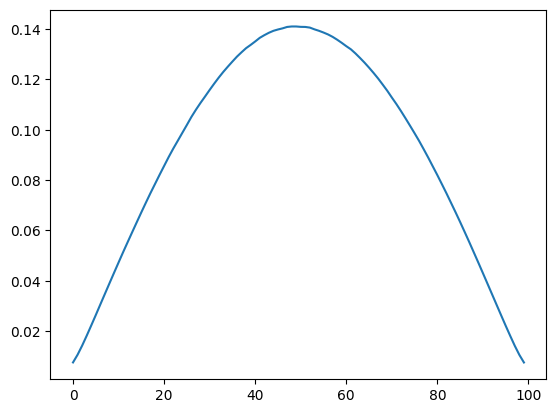

In [ ]:
import matplotlib.pyplot as mp

potenid = 46
mp.plot(f[0])
print(f)

len(trainx[potenid])

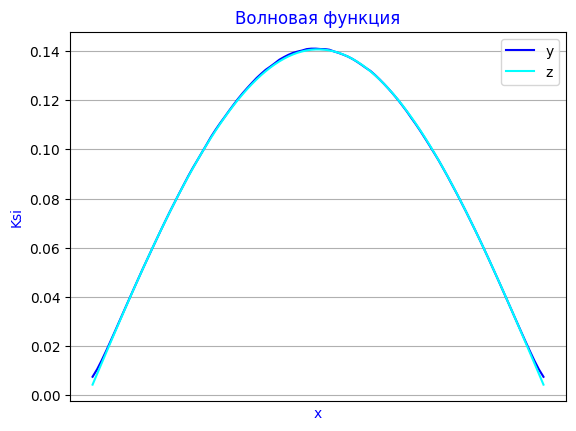

In [ ]:
plot_two_graph(f[0], eigenvectors[0] , 'blue', 'aqua')

теперь выведем график ошибки

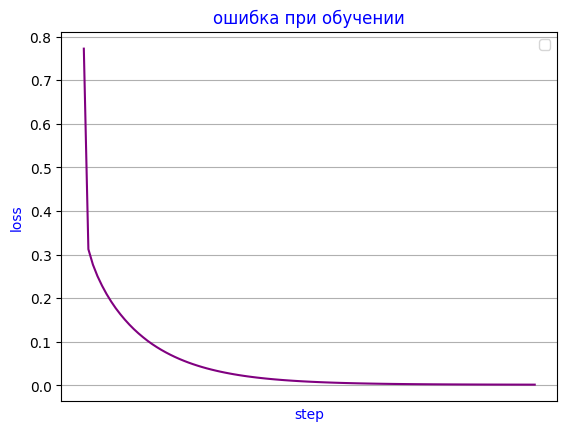

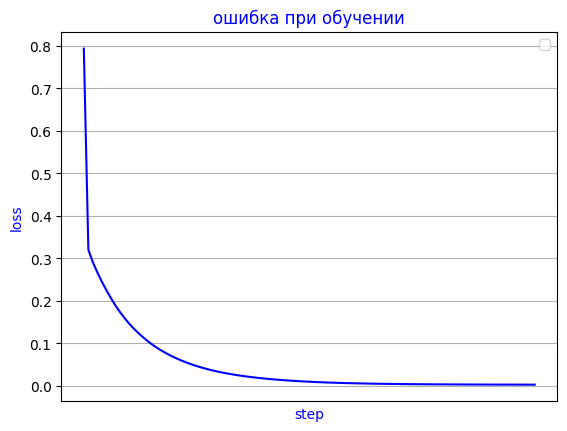

In [ ]:
def plot_graph(y, color_y):
    x = np.arange(len(y))
    plt.plot(x, y, color = color_y)
    plt.xlabel('step', color = 'blue')
    plt.ylabel('loss', color = 'blue')
    plt.title('ошибка при обучении', color = 'blue')
    plt.grid(True)
    plt.legend()
    plt.xticks([])
    plt.show()
plot_graph(train_losses, 'purple')
plot_graph(valid_losses, 'blue')

теперь же посчитаем погрешность

In [ ]:
num1 = E0(H, eigenvectors[0], a, b)
num2 = E0(H, f[0], a, b)
absolut_er = abs(num1 - num2)
pog = num2/num1

print(f"значение абсолютной погрешности: {absolut_er}")



значение абсолютной погрешности: 0.37220219754208417
